# Object Detection with SSD
### Here we demostrate detection on example images using SSD with PyTorch

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.utils.serialization import load_lua
import numpy as np
import cv2
if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

from ssd import build_ssd
# from models import build_ssd as build_ssd_v1 # uncomment for older pool6 model

## Build SSD300 in Test Phase
1. Build the architecture, specifyingsize of the input image (300),
    and number of object classes to score (21 for VOC dataset)
2. Next we load pretrained weights on the VOC0712 trainval dataset  

In [3]:
net = build_ssd('test', 300, 21)    # initialize SSD
net.load_weights('../weights/ssd300_0712_iter_115000.pth')

Loading weights into state dict...
Finished!


## Load Image 
### Here we just load a sample image from the VOC07 dataset 

In [4]:
# image = cv2.imread('./data/example.jpg', cv2.IMREAD_COLOR)  # uncomment if dataset not downloaded
%matplotlib inline
from matplotlib import pyplot as plt
from data import VOCDetection, VOCroot, AnnotationTransform
# here we specify year (07 or 12) and dataset ('test', 'val', 'train') 
#testset = VOCDetection(VOCroot, [('2007', 'val')], None, AnnotationTransform)
#img_id = 58
#image = testset.pull_image(img_id)

In [8]:
path = "/users/gpu/prabudc1/Penndata/frames/"
save_path = "./"

In [13]:
def make_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)    

In [16]:
directories = os.listdir(path)

In [18]:
for directory in directories:
    f_path = path+directory+"/"
    files = os.listdir(f_path)
    s_path = save_path+directory+"/"
    if os.path.exists(s_path):
        continue
    make_dir(s_path)
    for f in files:
        image = cv2.imread(f_path+f, cv2.IMREAD_COLOR)
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        x = cv2.resize(image, (300, 300)).astype(np.float32)
        x -= (104.0, 117.0, 123.0)
        x = x.astype(np.float32)
        x = x[:, :, ::-1].copy()
        #plt.imshow(x)
        x = torch.from_numpy(x).permute(2, 0, 1)
        
        #pass through the SSD network
        xx = Variable(x.unsqueeze(0))     # wrap tensor in Variable
        if torch.cuda.is_available():
            xx = xx.cuda()
        y = net(xx)
    
        detections = y.data
        scale = torch.Tensor([rgb_image.shape[1::-1], rgb_image.shape[1::-1]])
    
        detect = np.empty((0,4))
        j = 0
        #person class is 16
        while detections[0,15,j,0] >= 0.5:
            pt = (detections[0,15,j,1:]*scale).cpu().numpy()
            coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
            coo = np.asarray([pt[0], pt[1], pt[2]-pt[0]+1, pt[3]-pt[1]+1])
            detect = np.vstack((detect,coo))
            j+=1
        np.save(s_path+f+"_pred", detect)
    print("Directory ",directory," done")

/users/gpu/utkrsh/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/tensor.py:309: UserWarning: self and other not broadcastable, but have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.mul(other)


Directory  1541  done
Directory  1951  done
Directory  1025  done
Directory  0871  done
Directory  1865  done
Directory  0417  done
Directory  1720  done
Directory  1467  done
Directory  0929  done
Directory  0226  done
Directory  0400  done
Directory  1245  done
Directory  1983  done
Directory  0488  done
Directory  0911  done
Directory  1745  done
Directory  1712  done
Directory  1042  done
Directory  2043  done
Directory  0889  done
Directory  2214  done
Directory  0821  done
Directory  0134  done
Directory  1510  done
Directory  0569  done
Directory  1920  done
Directory  1077  done
Directory  0443  done
Directory  1407  done
Directory  1402  done
Directory  2238  done
Directory  0925  done
Directory  1972  done
Directory  2305  done
Directory  0016  done
Directory  0981  done
Directory  0003  done
Directory  1382  done
Directory  1398  done
Directory  2307  done
Directory  0596  done
Directory  0856  done
Directory  0761  done
Directory  1515  done
Directory  0557  done
Directory 

Directory  1465  done
Directory  0552  done
Directory  1558  done
Directory  1954  done
Directory  1396  done
Directory  1663  done
Directory  0056  done
Directory  1268  done
Directory  0630  done
Directory  1583  done
Directory  0936  done
Directory  0835  done
Directory  1684  done
Directory  0487  done
Directory  2139  done
Directory  0655  done
Directory  0397  done
Directory  0481  done
Directory  1694  done
Directory  1784  done
Directory  0863  done
Directory  0128  done
Directory  1355  done
Directory  1271  done
Directory  1785  done
Directory  1297  done
Directory  2149  done
Directory  0011  done
Directory  1232  done
Directory  0014  done
Directory  1993  done
Directory  1252  done
Directory  0086  done
Directory  1850  done
Directory  0021  done
Directory  0180  done
Directory  1950  done
Directory  0738  done
Directory  2065  done
Directory  1547  done
Directory  0541  done
Directory  1764  done
Directory  1921  done
Directory  0219  done
Directory  0837  done
Directory 

Directory  2074  done
Directory  1790  done
Directory  1654  done
Directory  2186  done
Directory  1866  done
Directory  1222  done
Directory  0141  done
Directory  0595  done
Directory  0953  done
Directory  1874  done
Directory  1162  done
Directory  0289  done
Directory  0265  done
Directory  2094  done
Directory  2248  done
Directory  0342  done
Directory  0725  done
Directory  1385  done
Directory  2194  done
Directory  1997  done
Directory  0231  done
Directory  1593  done
Directory  1494  done
Directory  1627  done
Directory  0475  done
Directory  1545  done
Directory  0776  done
Directory  1287  done
Directory  1186  done
Directory  0918  done
Directory  1346  done
Directory  1397  done
Directory  2123  done
Directory  0869  done
Directory  1227  done
Directory  0949  done
Directory  2067  done
Directory  1454  done
Directory  1780  done
Directory  0412  done
Directory  1022  done
Directory  0747  done
Directory  2005  done
Directory  0499  done
Directory  1797  done
Directory 

Directory  1757  done
Directory  0751  done
Directory  1681  done
Directory  1275  done
Directory  0137  done
Directory  0773  done
Directory  1915  done
Directory  0693  done
Directory  1180  done
Directory  2251  done
Directory  0969  done
Directory  1877  done
Directory  0908  done
Directory  0613  done
Directory  0683  done
Directory  2213  done
Directory  0462  done
Directory  0068  done
Directory  0080  done
Directory  1885  done
Directory  0208  done
Directory  2183  done
Directory  0532  done
Directory  0429  done
Directory  2318  done
Directory  1575  done
Directory  2084  done
Directory  2190  done
Directory  0746  done
Directory  0676  done
Directory  0253  done
Directory  2001  done
Directory  0096  done
Directory  1019  done
Directory  0848  done
Directory  2188  done
Directory  2282  done
Directory  1132  done
Directory  0816  done
Directory  0864  done
Directory  1716  done
Directory  1503  done
Directory  2217  done
Directory  0591  done
Directory  1185  done
Directory 

Directory  0142  done
Directory  0594  done
Directory  2082  done
Directory  1316  done
Directory  2280  done
Directory  2055  done
Directory  0675  done
Directory  0778  done
Directory  0064  done
Directory  0325  done
Directory  0652  done
Directory  0010  done
Directory  0335  done
Directory  0257  done
Directory  1829  done
Directory  0218  done
Directory  1642  done
Directory  1970  done
Directory  1012  done
Directory  0581  done
Directory  0090  done
Directory  0103  done
Directory  0897  done
Directory  0136  done
Directory  0905  done
Directory  1661  done
Directory  1321  done
Directory  1088  done
Directory  1733  done
Directory  0882  done
Directory  0825  done
Directory  1527  done
Directory  1408  done
Directory  0784  done
Directory  0777  done
Directory  1810  done
Directory  1959  done
Directory  1411  done
Directory  2168  done
Directory  2266  done
Directory  0847  done
Directory  0611  done
Directory  1472  done
Directory  0627  done
Directory  0731  done
Directory 

Directory  1021  done
Directory  0213  done
Directory  2049  done
Directory  1611  done
Directory  0814  done
Directory  2295  done
Directory  1378  done
Directory  1962  done
Directory  0250  done
Directory  0800  done
Directory  2050  done
Directory  1872  done
Directory  0844  done
Directory  0659  done
Directory  1744  done
Directory  1255  done
Directory  1371  done
Directory  1565  done
Directory  1344  done
Directory  1605  done
Directory  1944  done
Directory  0285  done
Directory  2068  done
Directory  2310  done
Directory  0940  done
Directory  0937  done
Directory  1906  done
Directory  1767  done
Directory  0225  done
Directory  2092  done
Directory  2274  done
Directory  0638  done
Directory  1110  done
Directory  1102  done
Directory  0450  done
Directory  2230  done
Directory  1845  done
Directory  0177  done
Directory  1606  done
Directory  0476  done
Directory  0468  done
Directory  0241  done
Directory  1861  done
Directory  1674  done
Directory  1167  done
Directory 

In [7]:
#image = cv2.imread("./0964/000008.jpg")

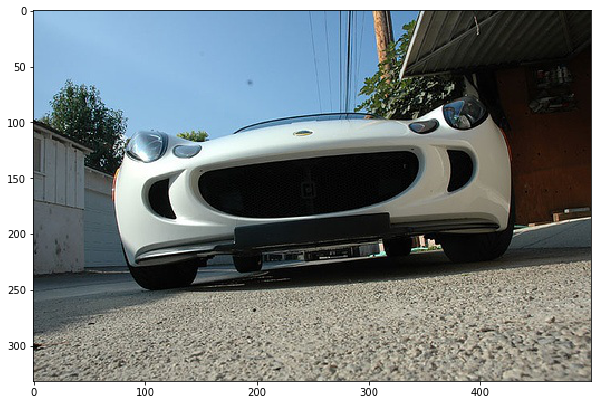

In [74]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# View the sampled input image before transform
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.show()

In [9]:
os.getcwd()

'/data/gpu/utkrsh/code/ssd.pytorch/demo'

## Pre-process the input.  
#### Using the torchvision package, we can create a Compose of multiple built-in transorm ops to apply 
For SSD, at test time we use a custom BaseTransform callable to
resize our image to 300x300, subtract the dataset's mean rgb values, 
and swap the color channels for input to SSD300.

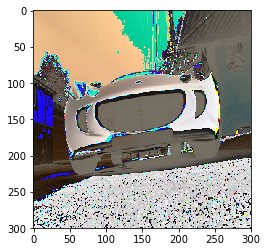

In [75]:
x = cv2.resize(image, (300, 300)).astype(np.float32)
x -= (104.0, 117.0, 123.0)
x = x.astype(np.float32)
x = x[:, :, ::-1].copy()
plt.imshow(x)
x = torch.from_numpy(x).permute(2, 0, 1)

## SSD Forward Pass
### Now just wrap the image in a Variable so it is recognized by PyTorch autograd

In [76]:
xx = Variable(x.unsqueeze(0))     # wrap tensor in Variable
if torch.cuda.is_available():
    xx = xx.cuda()
y = net(xx)

## Parse the Detections and View Results
Filter outputs with confidence scores lower than a threshold 
Here we choose 60% 

/users/gpu/utkrsh/anaconda3/envs/pytorch/lib/python3.6/site-packages/torch/tensor.py:309: UserWarning: self and other not broadcastable, but have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.mul(other)


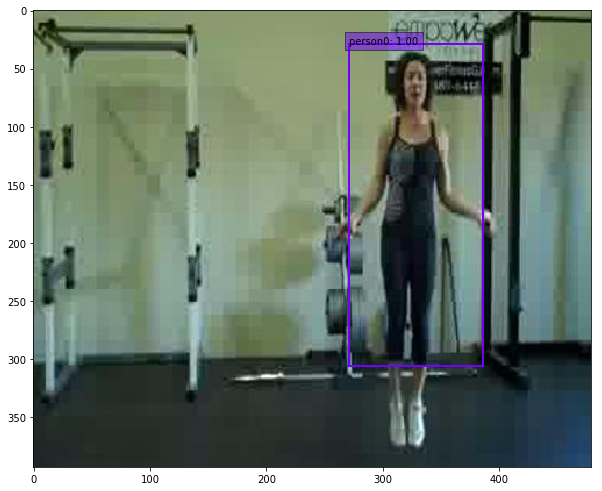

In [21]:

from data import VOC_CLASSES as labels
top_k=10

plt.figure(figsize=(10,10))
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
plt.imshow(rgb_image)  # plot the image for matplotlib
currentAxis = plt.gca()

detections = y.data
# detections have shape [batch_size, class_size, detections, score and bbox]
# scale each detection back up to the image
scale = torch.Tensor([rgb_image.shape[1::-1], rgb_image.shape[1::-1]])
detect = np.empty((0,3))
j = 0
#person class is 16
while detections[0,15,j,0] >= 0.5:
    score = detections[0,15,j,0]
    label_name = labels[15-1] + str(j)
    display_txt = '%s: %.2f'%(label_name, score)
    pt = (detections[0,15,j,1:]*scale).cpu().numpy()
    coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
    coo = np.asarray(coords)
    detect = np.vstack((detect,coo))
    
    color = colors[15]
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
    j+=1

In [82]:
detect.shape

(0, 3)

In [48]:
scores = detections[0,15,:,0] >= 0.5

In [25]:
detections[0,15,2,0]

0.0582880973815918